In [1]:
import torch
import numpy as np

# Load and Visualize the Data

In [2]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler


# If you want to load data in parallel
num_worker = 0

# Number of training images will be fed to network per epoch
batch_size = 20

# Validation Size
valid_size = 0.2

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

train_data = datasets.MNIST(root='data', train= True, download=True, transform = transform)


test_data = datasets.MNIST(root = 'data', train = False, download = True, transform = transform)



num_train = len(train_data)

indices = list(range(num_train))

np.random.shuffle(indices)

split = int(np.floor(valid_size * num_train))

train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)


train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, sampler=train_sampler, num_workers=num_worker)

valid_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, sampler=valid_sampler, num_workers=num_worker)

test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_worker)



# Visualize a Batch of Training Data

The first step in a classification task is to take a look at the data, make sure it is loaded correctly, then make initial observations about patterns in that data

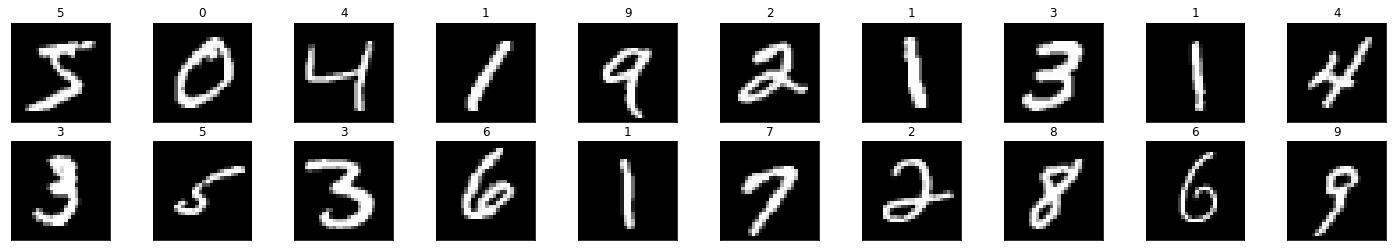

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

#Obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()


fig = plt.figure(figsize = (25,4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks = [])
    ax.imshow(np.squeeze(images[idx]), cmap = 'gray')
    ax.set_title(str(labels[idx].item()))

# Define the Network Architecture

In [4]:
from torch import nn, optim
import torch.nn.functional as F
import time

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        #Linear layer
        self.fc1 = nn.Linear(28*28, 256)
        
        self.fc2 = nn.Linear(256, 128)
        
        self.fc3 = nn.Linear(128, 64)
        
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = x.view(-1, 28*28)
        
        x = F.relu(self.fc1(x))
        
        x = F.relu(self.fc2(x))
        
        x = F.relu(self.fc3(x))
        
        x = F.log_softmax(self.fc4(x))
 
        return x
# Initialize the network
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

model = Net()

model.to(device)

criterion = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.02)

cuda:0


In [ ]:
http://localhost:8888/?token=a60eb6ac35312272046aff483227101405319b1cbff7367f

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 1 	 training loss: 1.154661
Epoch: 2 	 training loss: 0.326306
Epoch: 3 	 training loss: 0.236515
Epoch: 4 	 training loss: 0.179901
Epoch: 5 	 training loss: 0.143931
Epoch: 6 	 training loss: 0.119892
Epoch: 7 	 training loss: 0.102208
Epoch: 8 	 training loss: 0.088327
Epoch: 9 	 training loss: 0.077188
Epoch: 10 	 training loss: 0.067870
Epoch: 11 	 training loss: 0.059943
Epoch: 12 	 training loss: 0.053048
Epoch: 13 	 training loss: 0.047190
Epoch: 14 	 training loss: 0.041852
Epoch: 15 	 training loss: 0.036950
Epoch: 16 	 training loss: 0.032559
Epoch: 17 	 training loss: 0.028597
Epoch: 18 	 training loss: 0.025153
Epoch: 19 	 training loss: 0.021999
Epoch: 20 	 training loss: 0.019230
Epoch: 21 	 training loss: 0.016730
Epoch: 22 	 training loss: 0.014576
Epoch: 23 	 training loss: 0.012657
Epoch: 24 	 training loss: 0.010970
Epoch: 25 	 training loss: 0.009523
Epoch: 26 	 training loss: 0.008288
Epoch: 27 	 training loss: 0.007241
Epoch: 28 	 training loss: 0.006328
E

# Load Data


In [11]:


def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = Net(checkpoint['input_size'],
                             checkpoint['output_size'],
                             checkpoint['hidden_layers'])
    model.load_state_dict(checkpoint['state_dict'])
    
    return model

In [12]:
model = load_checkpoint('checkpoint.pth')
print(model)

KeyError: 'input_size'

# Test the network

In [22]:
#Initialize
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

for data, target in test_loader:
    #forward pass
    output = model(data)
    #loss 
    loss = criterion(output, target)
    #Update test loss
    test_loss += loss.item()*data.size(0)
    
    #Convert output probabilities to predicted class
    #Following function returns (values, indices) where values would be the largest in dim 1
    #and indices will be the index of values
    _, pred = torch.max(output, 1)
    
    #Compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    
    
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

test_loss = test_loss/len(test_loader.dataset)

print('Test loss: {.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test accuracy of %5s: %2d%% (%2d/%2d)' %
             str(i), 100 * class_correct[i] / class_total[i],
             np.sum(class_correct[i])), np.sum(class_total[i])

RuntimeError: Expected object of device type cuda but got device type cpu for argument #2 'mat1' in call to _th_addmm

In [33]:
a = np.array([[1, 22, 3, 4]])

a = torch.from_numpy(a)

type(a)

torch.Tensor

In [34]:
values, indices = torch.max(a, 1)

In [35]:
values

tensor([22], dtype=torch.int32)

In [36]:
indices

tensor([1])